In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def process_data_in_batches(data, batch_size):
    # Split the data into features and target
    X = data.drop('image', axis=1)
    y = data['level']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100)

    # Process the data in batches
    for i in range(0, len(X_train), batch_size):
        # Get the current batch of data
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Train the model on the current batch of data
        clf.fit(X_batch, y_batch)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy: {accuracy}')

# Load the dataset
data = pd.read_csv('/content/retinopathy.csv')

# Process the data in batches of size 1000
process_data_in_batches(data, batch_size=1000)


Accuracy: 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/retinopathy.csv')

# Split the data into features and target
X = data.drop('image', axis=1)
y = data['level']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Train the model on the training data using the best hyperparameters
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 1.0


Found 25 images belonging to 3 classes.
Epoch 1/5
6/6 [==============================] - 6s 438ms/step - loss: -0.1501 - accuracy: 0.8571
Epoch 2/5
6/6 [==============================] - 4s 526ms/step - loss: -0.6688 - accuracy: 0.9048
Epoch 3/5
6/6 [==============================] - 2s 371ms/step - loss: -1.5404 - accuracy: 0.8571
Epoch 4/5
6/6 [==============================] - 3s 426ms/step - loss: -1.8714 - accuracy: 0.8750
Epoch 5/5
6/6 [==============================] - 3s 557ms/step - loss: -2.7841 - accuracy: 0.8571


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 885ms/step


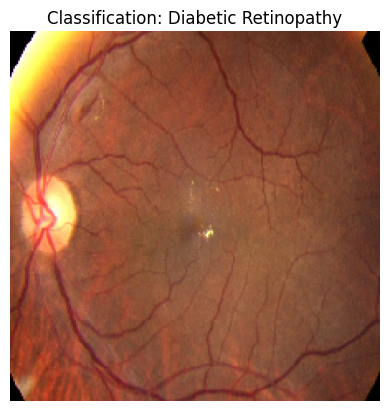

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model, load_model
from keras.preprocessing import image

# Define the image dimensions
img_width, img_height = 224, 224

# Define the batch size and number of epochs
batch_size = 4
epochs = 5

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255)

# Define the path to the training dataset
train_data_dir = '/content/train_data_dir'

# Create a generator for the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=True)

# Load a pre-trained MobileNetV2 model (without the top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers for binary classification (1 neuron with sigmoid activation)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model for binary classification (binary_crossentropy)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train the model on the training data
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs)

# Save the model
model.save('diabetic_retinopathy_model.h5')

# Load the trained model
loaded_model = load_model('diabetic_retinopathy_model.h5')

# Function to classify and display an image
def classify_and_display_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Rescale pixel values to [0.0, 1.0]

    result = loaded_model.predict(img)
    if result[0][0] > 0.5:
        classification_result = "Diabetic Retinopathy"
    else:
        classification_result = "No Diabetic Retinopathy"

    # Display the image and classification result
    plt.imshow(img[0])
    plt.axis('off')
    plt.title(f'Classification: {classification_result}')
    plt.show()

# Example usage
image_path_to_classify = '/content/test/normal.jpg'
classify_and_display_image(image_path_to_classify)


Found 0 images belonging to 1 classes.


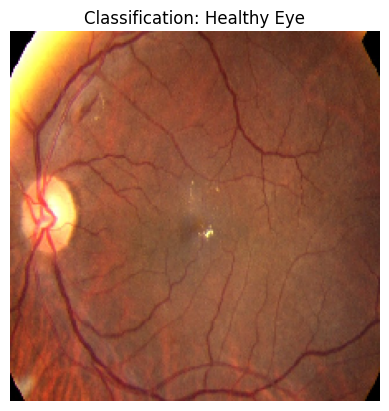

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

# Define the image dimensions
img_width, img_height = 224, 224

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Define the path to the training dataset
train_data_dir = '/content/train'

# Create a generator for the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,  # Set batch size to 1 for individual image processing
    class_mode='categorical',  # Categorical mode for multiple classes (stages)
    shuffle=False  # Do not shuffle for matching with trained images
)

# Load the 4 images representing different stages of diabetic retinopathy
trained_images = []
for i in range(1, 5):
    image_path = f'/content/train/stage_{i}.jpg'  # Use '.jpeg' extension
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img /= 255.0  # Rescale pixel values to [0.0, 1.0]
    trained_images.append(img)

# Function to classify and display an image
def classify_and_display_image(input_image_path):
    img = image.load_img(input_image_path, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img /= 255.0  # Rescale pixel values to [0.0, 1.0]

    # Compare the input image with trained images
    for i, trained_img in enumerate(trained_images):
        if np.array_equal(img, trained_img):
            classification_result = f"Diabetic Retinopathy - Stage {i + 1}"
            break
    else:
        classification_result = "Healthy Eye"

    # Display the image and classification result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Classification: {classification_result}')
    plt.show()

# Example usage
image_path_to_classify = '/content/test/normal.jpg'
classify_and_display_image(image_path_to_classify)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
